# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [21]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [15]:
print(spaceship.shape)

(8693, 14)


**Check for data types**

In [16]:
print(spaceship.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


**Check for missing values**

In [17]:
missing_values = spaceship.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [18]:
spaceship_cleaned = spaceship.dropna()

print(spaceship_cleaned.shape)

(6606, 14)


**Check for null values in numerical columns**

In [19]:
num_columns = spaceship.select_dtypes(include=['float64', 'int64']).columns
null_values = spaceship[num_columns].isnull().sum()

print(null_values)

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [ ]:
print(spaceship_cleaned['Cabin'].head())

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object


In [ ]:
# extract the deck (first letter before the '/') from the Cabin column
spaceship_cleaned['Deck'] = spaceship_cleaned['Cabin'].str[0]


/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_61825/2747444108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_cleaned['Deck'] = spaceship_cleaned['Cabin'].str[0]


In [ ]:
print(spaceship_cleaned['Deck'].unique())

['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']


- Drop PassengerId and Name

In [ ]:
spaceship_cleaned = spaceship_cleaned.drop(columns=['PassengerId', 'Name'])
print(spaceship_cleaned.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Deck'],
      dtype='object')


- For non-numerical columns, do dummies.

In [ ]:
spaceship_cleaned = pd.get_dummies(spaceship_cleaned, drop_first=True)

**Perform Train Test Split**

In [ ]:
features = spaceship_cleaned.select_dtypes(include=['number'])

print(features.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0


In [ ]:
target = spaceship_cleaned['Transported']

# convert to boolean
target = target.astype(bool)

print(target.head())

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
x_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3432,32.0,0.0,0.0,0.0,0.0,0.0
7312,4.0,0.0,0.0,0.0,0.0,0.0
2042,30.0,0.0,236.0,0.0,1149.0,0.0
4999,17.0,13.0,0.0,565.0,367.0,1.0
5755,26.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

3432    False
7312     True
2042    False
4999    False
5755     True
Name: Transported, dtype: bool

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(x_test)
pred

array([ True,  True,  True, ...,  True,  True, False])

In [ ]:
y_test.values

array([ True, False,  True, ...,  True,  True,  True])

- Evaluate your model's performance. Comment it

In [ ]:
knn.score(x_test, y_test)

0.7337367624810892

**Use appropriate EDA technique where necessary**

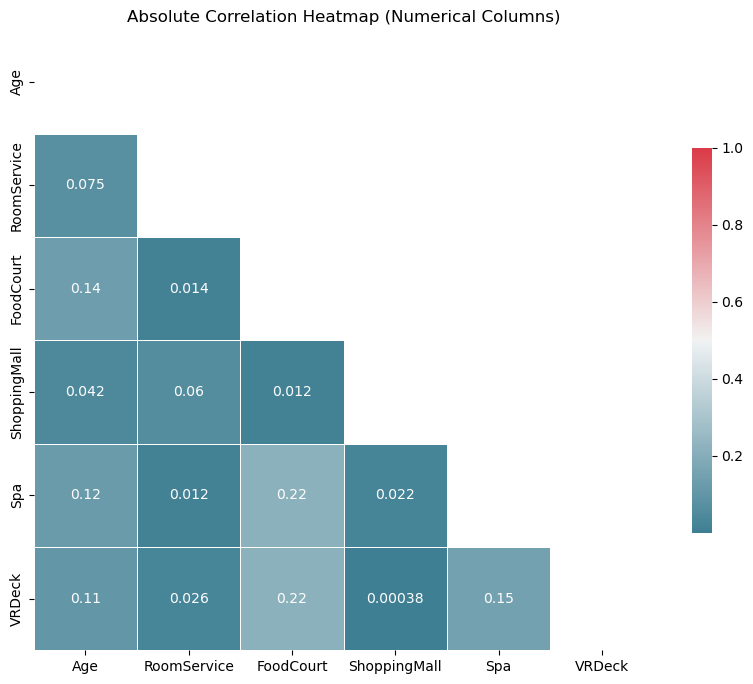

In [28]:
# compute absolute correlation
corr = np.abs(spaceship_cleaned[num_columns].corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.5}, 
    annot=True
)

plt.title("Absolute Correlation Heatmap (Numerical Columns)")
plt.show()